## **Machine Learning Theory and Application Vol.1: Linear Regression**
#### Part 1 - Intro to Univariate Linear Regresion and the Algebraic Solution Method in Python (Post#1)

### **Introduction**
Over the course of this blog post, I am going to...
- Explain the basic concepts of Univariate Linear Regression
- Develop the code for this in 6 methods from scratch starting from theoretical principles
- Give suggestions on how to choose the right method for real world application
- Provide an example use case study with a real world dataset

After understanding this information, the reader will be able to formulate some linear regression algorithms, code them from scratch, select an appropriate ULR algorithm for a dataset, and apply that algorithm to the dataset.

This blog post assumes the reader has programming skills in python and mathematics skills that include linear algebra with some calculus.

### **What is Univariate Linear Regression?**

<i>Univariate Linear Regression</i>(ULR) also known as <i>Simple Linear Regression</i> is a model that fits a linear function to an observable feature graphed against a target variable. It is univariate because only a single feature is used to model the output variable. A model that fits a linear function using multiple observable features is <i>Multivariate Linear Regression.</i>

### **How does it work?**

An overview of the main functional parts of ULR look like this:
- Hypothesize the form of the model we are looking for. This manifests as the common "slope intercept form" model in ULR and is also called the hypothesis function.
- Define the residual error in terms of our dataset's true dependent values and our model's predicted dependent values
- An estimation technique is chosen, and a loss function is then defined for individual datapoints in the dataset
- From the loss function, a cost function is defined for the sum of all datapoints' losses in the dataset
- The goal of finding the parameters is then achieved by minimizing the cost function with respect to the technique(s) of choice
- From the minimization, the parameters are solved
- From the parameters, we can predict new output values with input values

ULR assumes our independent and dependent are linear with respect to one another. From real world data, we have a list of independent datapoints and a list of dependent datapoints. If the data is truly linear in nature, a linear regression model will be a good fit for the dataset. The term <i>fit</i> means that our model has defined values for the parameters(known slope and intercept parameters ULR) that were calculated directly from our dataset. These are calculated by assuming there is some error between the dataset's true dependent values and the dependent values predicted by our linear model. 

From studies in linear algebra, we should already be familiar with the form of a linear model that has a single dependent variable. This model is the familiar slope intercept form equation which looks like this:
<br><br>
$ y = mx + b $ 

Now if we wanted, we could very quickly come up with a terrible linear fit to a dataset. To demonstrate a bad fit, let's define some simple datapoints:
<br><br>
$x = [1,2,3,4,5]$ and $y = [2,4,6,8,10]$

In [84]:
df = pd.DataFrame({'x':[1,2,3,4,5],'y':[2,4,6,8,10]})
display(df)

<IPython.core.display.Javascript object>

,x,y
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


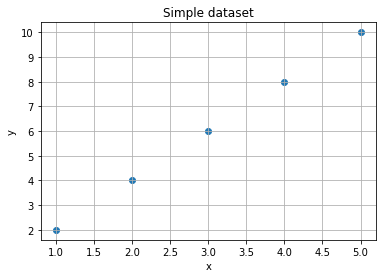

In [82]:
plt.scatter(df['x'],df['y'])
plt.title("Simple dataset")
plt.xlabel('x')
plt.ylabel('y')
plt.grid();

we can see that assuming $m = 13.37$ and $b = 50$ such that
<br><br>
$y = 13.37x + 50$

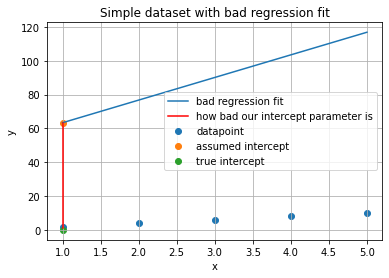

In [78]:
# Plot the datapoints
plt.scatter(df['x'],df['y'], label='datapoint')

# Get and predicted datapoints for and plot the regression line
y_preds = 13.37*df['x']+50
plt.plot(df['x'],y_preds, label='bad regression fit')

# Plot the predicted intercept (b_predicted)
plt.scatter(1,50+13.37, label='assumed intercept')

# Plot the true intercept of our data (b_true)
plt.scatter(1,0, label='true intercept')

# Visualize the magnitude of error between the predicted and true intercept parameter as a red line
plt.plot(np.ones(50),np.arange(1,(50+13.37),(50+13.37)/50), c='red', label='how bad our intercept parameter is')


plt.title("Simple dataset with bad regression fit")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

Note: The above figure is displaying the error of predicted intercept parameter to true intercept parameter(This is only the residual error of the first datapoint). This highlights the fact that our parameter values are terrible.

<br><br>
This a poor choice of parameters because our line will start at an excessively high value for $y$ and have an extremely tall slope. We would say that the error or distance from the datapoints generated by the regression line to the datapoints in our dataset will be very high (Our x and y data's true regression line is at $y = 2x+2$). 
<br><br>
Then the question becomes, <b>how do we make this error as small as possible?</b> That is, how do we minimize the error between our model's datapoints and our dataset's datapoints? We can now introduce a solution method to achieve this regression line. The method we will discuss in this post is the Mean Squared Estimation method. Before that, let's formally define the rest of our theory so we can jump right into the solution methods.


Starting from the first equation, we get the hypothesis function $h(x)$ for this model:
<br><br>
$ h(x) = \theta_1 x + \theta_0  $
<!-- <div style="text-align: right"> (1) </div> -->

<br>
In supervised machine learning, we define the <b>hypothesis function</b> as the function we believe best models the target values.

<br>
These will be our predicted values and we can define them in terms of predicted value $y^{(p)}$ where $y^{(p)}_i$ is the ith predicted value as:
<br><br>
$y^{(p)}_i = \theta_1 x_i + \theta_0$
<br><br>
and $x_i$ is the ith independent value. The values for $x_i$ come directly from our dataset.
<br><br>


Next, we define the true dependent values as $y^{(t)}$ where $y^{(t)}_i$ is the ith true dependent value. This also comes directly from our dataset.
<br><br>

When trying to fit a linear model to data points, there will also always exist some error between those the true values and predicted values. This is known as the residual error. We say that the predicted depedent value is the true dependent value plus some residual error. In mathematical form:
<br><br>
$ y^{(p)}_i = y^{(t)}_i + e_i$
<br>
$ \implies \theta_1 x_i + \theta_0 = y^{(t)} + e_i$
<br><br>
where $e_i$ is the ith residual error.
<br><br>


If we rearrange this equation, then we see that the ith residual error value is:<br>
<br>
$ e_i = y^{(p)}_i - y^{(t)}_i$
<br>
$ = (\theta_1 x_1 + \theta_0) - y^{(t)}_i$
<br><br>

### **Method 1 - Mean Squared Estimation** 

#### **Starting with the Theory**

**Matrix Notation** 

We will now introduce these concepts and further develop them in matrix notation.
<br>
Note: boldface type $\textbf{A}$ indicates matrix $\textbf{A}$ and $\textbf{A} \textbf{B}$ side by side assumes a dot product between those matrices such that $\textbf{A} \textbf{B} = \textbf{A} \cdot \textbf{B}$

Given $n$ datapoints coming directly from our dataset, let $\bf{X}$ be the $(n \times 2)$ design matrix:
<br><br>
$\bf{X} = 
\begin{bmatrix}
1 \ x_1 \\
1 \ x_2 \\
... \ ... \\
1 \ x_n
\end{bmatrix}
$
<br><Br>

and $\boldsymbol{\theta}$ be the $(2 \times 1)$parameter matrix:
<br><br>
$
\boldsymbol{\theta} =
\begin{bmatrix}
\theta_0 \\
\theta_1
\end{bmatrix}
$
<br><br>
Speficially for ULR, this matrix will have at least 1 parameter for the slope and potentially a second parameter for bias.
<br><br>

and $\textbf{Y}$ be the $(n \times 1)$ matrix of true values from our dataset:
<br><br>
$
\textbf{Y} = 
\begin{bmatrix}
y_1^{(t)} \\
y_2^{(t)} \\
\dots \\
y_n^{(t)}
\end{bmatrix}
$
<br><br>

This implies that our predicted value matrix $\boldsymbol{\hat{Y}}$ is
<br><br>
$ \boldsymbol{\hat{Y}}=
\begin{bmatrix}
y_1^{(p)} \\
y_2^{(p)} \\
... \\
y_i^{(p)}
\end{bmatrix} = \bf{X}\boldsymbol{\theta} =
\begin{bmatrix}
\theta_0 + \theta_1 x_1 \\
\theta_0 + \theta_1 x_2 \\
\dots \\
\theta_0 + \theta_1 x_n \\
\end{bmatrix}
$
<br><br>

Let $\textbf{e}$ be the $(n\times 1)$ residual error matrix:
<br><br>
$
\textbf{e} = \begin{bmatrix}
e_1 \\
e_2 \\
... \\
e_n
\end{bmatrix} = \begin{bmatrix}
(\theta_0+\theta_1 x_1) - y^{(t)}_1 \\
(\theta_0+\theta_1 x_2) - y^{(t)}_2 \\
... \\
(\theta_0+\theta_1 x_i) - y^{(t)}_i
\end{bmatrix}
$
<br><br>

Then,our model in matrix form looks like:
<br><br>
$ \textbf{Y} = \textbf{X} \boldsymbol{\theta} + \textbf{e} $
<br><br>

so that the residual error is 
<br><br>
$ \textbf{e} = \boldsymbol{\hat{Y}}-\textbf{Y} = \textbf{X}\boldsymbol{\theta} - \textbf{Y} $
<br><br>

**What then is the associated error for each datapoint $e_i$ since $x_i$ and $y^{(t)}_i$ are given?**
<br>
To calculate the values inside the $\textbf{e}$, we are still missing values for our parameters in our parameter matrix $\boldsymbol{\theta}$. 
<br><br>

**What values should we use for these parameters?**
<br>
If our goal is to have a model that most closely fits the data, then we want to select parameters that give us the smallest residual error possible between the true and predicted dependent values. Said another way, we want to pick the values that minimize the loss.
<br>

##### **The Loss Function ($L_i$)** 

To begin the process of finding these parameters, we can define the <b>Loss Function $(L_i)$</b> as the error associated with a single data entry from our dataset. There are various types of loss functions that can be used to begin finding our parameters and one of the most common is the squared loss. The choice of loss function is beyond the scope of this article and should be studied further. For the Mean Squared Estimation Method, the loss function of choice is indeed the least square loss. To get this loss, previously, we defined the residual error as
<br><br>
$e_i = (\theta_1 x_i + \theta_0) - y_i$
<br><br>

For the Mean Squared Estimation method, we can define $L_i$ as
<br><br>
$L_i = [y^{(p)}_i - y^{(t)}_i]^2 = [(\theta_1 x_i + \theta_0) - y^{(t)}_i]^2$
<br><br>

Let us now define a helpful formula, the norm of a matrix:
<br><br>
$ ||\textbf{a}|| = \textbf{a}^T \textbf{a} = \sum^{n}_{i=1} a_i$
<br><br>

##### **The Cost Function $(J)$**

From the loss function, we define the <b>Cost Function $(J)$</b> as the error asscoated with our entire dataset. To go from Squared Loss as our loss function to Mean Squared Loss as our cost function, we take the average over all squared errors in our dataset:
<br><br>
$
J = MSE(L_i) =  \frac{1}{n}\sum_{i=1}^{n} L_i 
$

$ 
= \frac{1}{n}||L|| 
$

$
= \frac{1}{n} ||\boldsymbol{\hat{Y}} - \textbf{Y}||^2 
$

$
=  \frac{1}{n} ||\textbf{X} \boldsymbol{\theta}-\textbf{Y}||^2
$

<br>
where $MSE(L_i)$ is the Mean Squared Error function applied over the loss function $L_i$

Now, in expanded form the mean squared error is
<br><br>
$ 
\frac{1}{n}||\textbf{X}\boldsymbol{\theta} - \textbf{Y}||^2 = 
\frac{1}{n}
(\textbf{X}\boldsymbol{\theta}-\textbf{Y})^T (\textbf{X}\boldsymbol{\theta}-\textbf{Y})
$

$ = \frac{1}{n}
(\textbf{X}^T \boldsymbol{\theta}^T \textbf{X}\boldsymbol{\theta} - 
\textbf{Y}^T \textbf{X} \boldsymbol{\theta} - 
 \textbf{Y} \textbf{X}^T \boldsymbol{\theta}^T + 
\textbf{Y}^T \textbf{Y} )
$

$ = \frac{1}{n}(
\textbf{X}^T \boldsymbol{\theta}^T \textbf{X}\boldsymbol{\theta} -
2 \textbf{Y} \textbf{X}^T \boldsymbol{\theta}^T +
\textbf{Y}^T \textbf{Y}
)
$
<br><br>

##### **Minimizing the Cost Function**

The minimum value of this $MSE(L_i)$ occurs when the derivative of the $MSE(\textbf{e})$ with respect to the error or when 
<br><br>
$ \large \frac{\partial MSE(L_i)}{\partial \boldsymbol{\theta}} = 0$
<br><br>

This implies,
<br><br>
$
\frac{1}{n}
\frac{\partial}{\partial \boldsymbol{\theta}} (
\textbf{X}^T \boldsymbol{\theta}^T \textbf{X}\boldsymbol{\theta} -
2 \textbf{Y} \textbf{X}^T \boldsymbol{\theta}^T +
\textbf{Y}^T \textbf{Y}
) 
= 0 
$

$
\implies 0 = 
2 \textbf{X}^T \textbf{X} \boldsymbol{\theta} - 2 \textbf{Y} \textbf{X}^T + 0
$<br>

$
\implies  \textbf{X}^T \textbf{X} \boldsymbol{\theta} =  \textbf{Y} \textbf{X}^T
$<br>

$
\implies  \boldsymbol{\theta_{min}} = (\textbf{X}^T \textbf{X})^{-1} \textbf{Y} \textbf{X}^T
$
<br><br>

where 
<br>
$
\boldsymbol{\theta_{min}} = \begin{bmatrix}
\theta_{0_{min}} \\
\theta_{1_{min}} 
\end{bmatrix}
$
are the best parameters for our model.

##### **Checking that our result is the minimum**

To prove that this value for $\boldsymbol{\theta}$ is the minimum, we use <i>the second derivative test</i> from calculus:
<br><br>
$
\implies 
\frac{\partial}{\partial \boldsymbol{\theta}}
(\textbf{X}^T \textbf{X} \boldsymbol{\theta} - \textbf{Y} \textbf{X}^T)
= \textbf{X}^T \textbf{X}
$
<br><br>

since
<br><br>
$
 \textbf{X}^T \textbf{X}
\gt 0
$
<br><br>
this will always be positive, it is positive definite and is the minimum we seek

Lastly, to find our predictions with our now known mimized parameter values, we simply use equation (**?**) and plug in the values as shown here:
<br><br>
$
\hat{\textbf{Y}} = \textbf{X} \boldsymbol{\theta_{min}} = \textbf{X} (\textbf{X}^T \textbf{X})^{-1} \textbf{Y} \textbf{X}^T
$
<br><br>

#### **Constructing the Model in Python**

First, we import our necessary packages:

In [72]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

##### **Generating the Data**
Instead of starting with a dataset directly, let us generate specified true values with specified input values for a linear model and parameters of our choosing:
<br>
Let's use $y_i^{(t)} = 3 + 2x_i$ to generate our true values and lets let $x_i$ be a range of values whose length we will call vec_len:

In [66]:
def gen_data(vec_len):
    """
    Function to generate the random data that will be used for variosu linear regression methods.
    
    The linear equation, is defined as:
        y = th0 + th1*X + e 
          =   3 +   2*X + e
        
        y   - vector of dependent variables 
        x   - vector of independent variables
        th0 - constant intercept parameter
        th1 - constant slope parameter
        e   - vector of residual errors
    """
    
    # Generate the design matrix as a column vector of ones of size vec_len and a column vector of random standard normal values of size vec_len
    x_0, x_1 = np.ones(vec_len), np.random.standard_normal(vec_len)    
    
    # Stack the columns together to complete the design matrix
    X = np.column_stack((x_0,x_1))
    
    # Generate the vector that will contain the residual error so our datapoints are all not exactly on the regression line, we multiply by 2 to increase the size of error
    e = np.random.standard_normal(vec_len)
    
    # Return X as the design matrix, and Y as th0(=3) + th1(=2) * X(the second column's values, not the column of 1 values) + residual_error(e)
    return X, 3 + 2*X[:,1]+e #X,y

In [79]:
# Generate the data
X,y = gen_data(100);

Let's see what our generated data looks like:

<IPython.core.display.Javascript object>

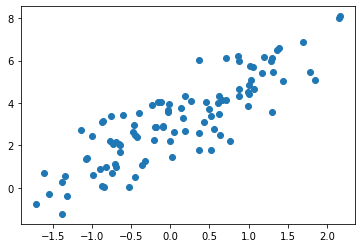

In [69]:
plt.scatter(X[:,1],y);

##### **Defining the Model**

In [73]:
def lr(X,y):
    """
    Numpy Mean Square Error Method for Univariate Linear Regression.
    
    Returns, in order:
        theta_0, theta_1, y_predictions
    """
    
    # Get the array of parameter values as b from the theory previously demonstrated
    b = inv( X.T @ X ) @ X.T @ y
    
    return b[0],b[1], X @ b

##### **Calculate the parameters and prediction values from the dataset using the model**

In [74]:
lr(X,y)

(3.016079377031092,
 1.8700826362859087,
 array([ 1.73211562e+00,  1.80822235e+00,  3.36395785e+00,  2.57516630e+00,
         3.70170572e+00,  1.00708542e+00,  6.17515041e+00,  2.11796047e+00,
         7.07210173e+00,  2.22193122e+00,  4.93871789e+00,  7.05581793e+00,
         1.38025655e+00,  6.34132112e+00,  1.04262428e+00,  3.51560553e+00,
         2.14514067e+00,  2.40765765e+00,  4.17869109e+00,  4.91567402e+00,
         1.25916773e-01,  4.45447386e+00,  5.60134060e+00,  5.45522456e+00,
         4.42231842e-01,  3.32805266e+00,  2.99123857e+00,  1.40350376e+00,
         4.89199764e+00,  5.55339912e+00,  5.20180058e+00,  4.19630596e+00,
         2.16999152e+00,  2.17612967e+00,  1.48305563e+00,  2.72471325e+00,
         5.44181258e+00,  1.34451208e+00,  3.87771544e+00,  3.98183428e+00,
         1.38692742e+00,  3.82008399e+00,  1.57435035e+00,  2.80601465e+00,
         3.00558024e+00,  4.33724142e+00,  3.37179018e+00,  3.09839602e+00,
         4.24238350e+00,  1.71220385e+00,  2.84

##### **Visualization - our regression line vs our actual datapoints**

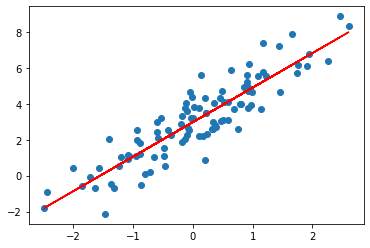

In [80]:
# Plot of the values from the dataset
plt.scatter(X[:,1],y)

# Plot of regression line
plt.plot(X[:,1],lr(X,y)[2],c='red');

##### **A Little Code Golf**
For a model with these assumptions, the parameters or predicted values could be calculated from numpy with a single line of code.
<br>
Assuming we already have our data defined from a dataset, or in our case from gen_data,
we could either get the parameter values directly by our formula for theta_min:

In [76]:
inv(X.T@X)@X.T@y

array([3.01607938, 1.87008264])

or, we can get the yhat prediction values using:

In [77]:
X@inv(X.T@X)@X.T@y

array([ 1.73211562e+00,  1.80822235e+00,  3.36395785e+00,  2.57516630e+00,
        3.70170572e+00,  1.00708542e+00,  6.17515041e+00,  2.11796047e+00,
        7.07210173e+00,  2.22193122e+00,  4.93871789e+00,  7.05581793e+00,
        1.38025655e+00,  6.34132112e+00,  1.04262428e+00,  3.51560553e+00,
        2.14514067e+00,  2.40765765e+00,  4.17869109e+00,  4.91567402e+00,
        1.25916773e-01,  4.45447386e+00,  5.60134060e+00,  5.45522456e+00,
        4.42231842e-01,  3.32805266e+00,  2.99123857e+00,  1.40350376e+00,
        4.89199764e+00,  5.55339912e+00,  5.20180058e+00,  4.19630596e+00,
        2.16999152e+00,  2.17612967e+00,  1.48305563e+00,  2.72471325e+00,
        5.44181258e+00,  1.34451208e+00,  3.87771544e+00,  3.98183428e+00,
        1.38692742e+00,  3.82008399e+00,  1.57435035e+00,  2.80601465e+00,
        3.00558024e+00,  4.33724142e+00,  3.37179018e+00,  3.09839602e+00,
        4.24238350e+00,  1.71220385e+00,  2.84369362e+00,  4.65110274e+00,
        2.67571684e+00,  

of course, there are limitations to the linear algebra solution method as not all input shapes in real datasets will behave well with this matrix formulation.

This concludes Post#1 on Intro to Univariate Linear Regresion and the Algebraic Solution Method in Python